In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
from sklearn.utils import all_estimators
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [38]:
!pip install xgboost

In [36]:
!pip install imbalanced-learn

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.dropna(inplace = True)

In [5]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

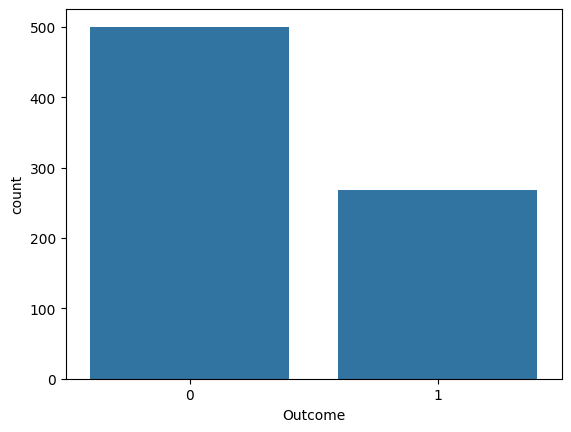

In [11]:
sns.countplot(x = 'Outcome',data = data)

In [7]:
X = data.drop('Outcome',axis = 1)
Y = data['Outcome']

In [ ]:
## oversampling

In [17]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = oversampler.fit_resample(X, Y)

c:\Users\reddy\anaconda3\envs\mlops\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\Users\reddy\anaconda3\envs\mlops\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [8]:
smote = SMOTE(random_state=42)
X_oversampled, y_oversampled = smote.fit_resample(X,Y)

c:\Users\reddy\anaconda3\envs\mlops\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [18]:
new_data = pd.DataFrame(X_oversampled, columns=X.columns)
new_data['Outcome'] = y_oversampled

In [41]:
new_data['Outcome'].value_counts()

Outcome
1    500
0    500
Name: count, dtype: int64

In [9]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(X_oversampled)
x_transform = pre_process.fit_transform(X_oversampled)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_transform, y_oversampled, test_size = .10, random_state = 42)

In [11]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine (SVM)": SVC(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier() }

In [12]:
results = {}

In [13]:
for clf_name, clf in classifiers.items():
    try:
      
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[clf_name] = {
            "accuracy": accuracy,
            "classification_report": classification_report(y_test, y_pred, output_dict=True)
        }
        
        print(f"Classifier: {clf_name}, Accuracy: {accuracy:.4f}")
        
    except Exception as e:
        print(f"Error with {clf_name}: {e}")

for model_name, result in results.items():
    print(f"\n{model_name} Classification Report:")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(pd.DataFrame(result['classification_report']).transpose())

Classifier: Logistic Regression, Accuracy: 0.7100
Classifier: Random Forest, Accuracy: 0.8100
Classifier: Support Vector Machine (SVM), Accuracy: 0.7600
Classifier: Naive Bayes, Accuracy: 0.7300
Classifier: XGBoost, Accuracy: 0.7900

Logistic Regression Classification Report:
Accuracy: 0.7100
              precision    recall  f1-score  support
0              0.725490  0.711538  0.718447    52.00
1              0.693878  0.708333  0.701031    48.00
accuracy       0.710000  0.710000  0.710000     0.71
macro avg      0.709684  0.709936  0.709739   100.00
weighted avg   0.710316  0.710000  0.710087   100.00

Random Forest Classification Report:
Accuracy: 0.8100
              precision  recall  f1-score  support
0              0.866667  0.7500  0.804124    52.00
1              0.763636  0.8750  0.815534    48.00
accuracy       0.810000  0.8100  0.810000     0.81
macro avg      0.815152  0.8125  0.809829   100.00
weighted avg   0.817212  0.8100  0.809601   100.00

Support Vector Machine (SV